In [15]:
from pathlib import Path
import sys
import random

if 'notebooks' in str(Path.cwd()):
    sys.path.append(str(Path.cwd().parent))
    
from scripts import bandits
import matplotlib.pyplot as plt
import numpy as np

In [16]:
N = 10000
EPSILON = 0.025
ALPHA = 0.99
TIME_VARING_EPSILON = [0.5*(ALPHA)**i for i in range(N)]
PROBS = [0.005, 0.1, 0.25, 0.75]

In [17]:
def plot_evolution(all_estimates):
    fig, axs = plt.subplots(4, figsize=(16,8))
    counter = 0

    for prob, prob_estimates in zip(PROBS, all_estimates):
        axs[counter].plot(prob_estimates)
        axs[counter].axhline(prob, color='orange', linestyle='--')
        axs[counter].legend([str(prob), 'estimates'])
        counter += 1

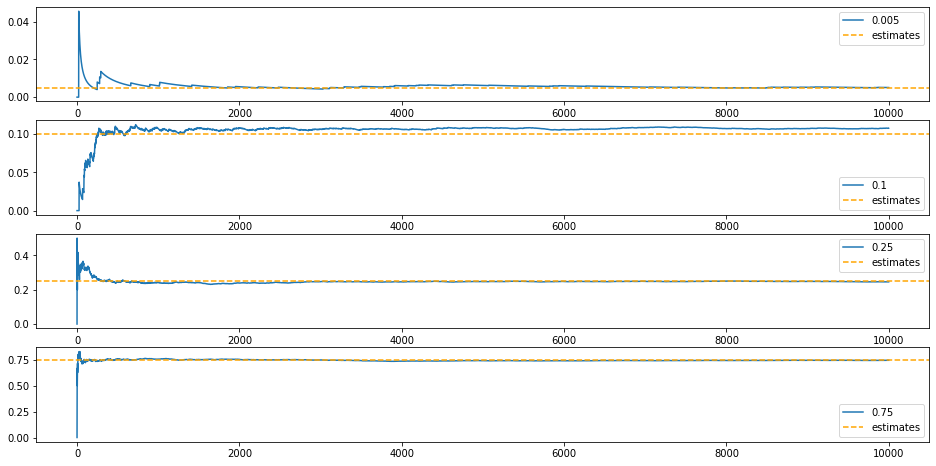

In [18]:
#Sanity Checking - if I pull each slot at a time, can I get a nice estimate of the real prob. of success?

bandit_list = list(map(bandits.Bandit, PROBS))
all_estimates = [[bandit.update(bandit.pull()) for i in range(N)] for bandit in bandit_list]

plot_evolution(all_estimates)

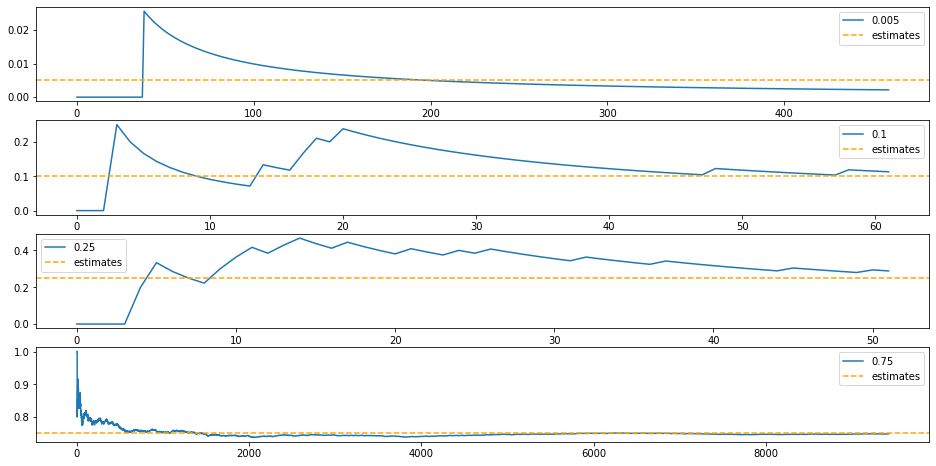

In [19]:
#Epsilon-Greedy Algorithm applied to the problem
current_mean = 0
mean_evolution = []
bandit_list = list(map(bandits.Bandit, PROBS))
optimal_prob = max(PROBS)
optimal_estimates = [max(map(lambda x: x.x_mean, bandit_list))]
estimates_evolution = [[] for slot in bandit_list]

# Epsilon - Greedy algorithm
for trial_num in range(N):
    if random.random() < EPSILON:
        #Explore
        slot_index = random.choice(range(4))
        outcome = bandit_list[slot_index].pull()
        estimates_evolution[slot_index].append(bandit_list[slot_index].update(outcome))
        current_mean += (outcome - current_mean)/(trial_num + 1)
    else:
        #Exploit
        best_slot_index = np.argmax(list(map(lambda x: x.x_mean, bandit_list)))        
        outcome = bandit_list[best_slot_index].pull()
        estimates_evolution[best_slot_index].append(bandit_list[best_slot_index].update(outcome))
        current_mean += (outcome - current_mean)/(trial_num + 1)
    mean_evolution.append(current_mean)
    optimal_estimates.append(max(map(lambda x: x.x_mean, bandit_list)))  
    
plot_evolution(estimates_evolution)

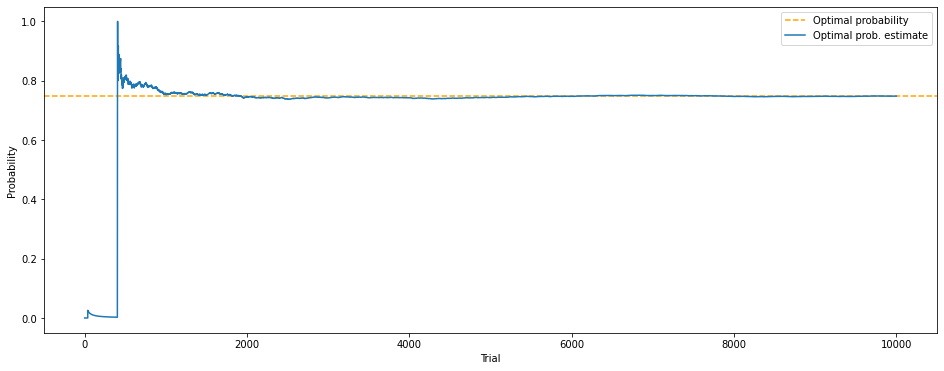

In [20]:
fig = plt.figure(figsize=(16,6))
plt.axhline(optimal_prob, color='orange', linestyle='--')
plt.plot(optimal_estimates)
plt.xlabel('Trial')
plt.ylabel('Probability')
plt.legend(['Optimal probability','Optimal prob. estimate'])

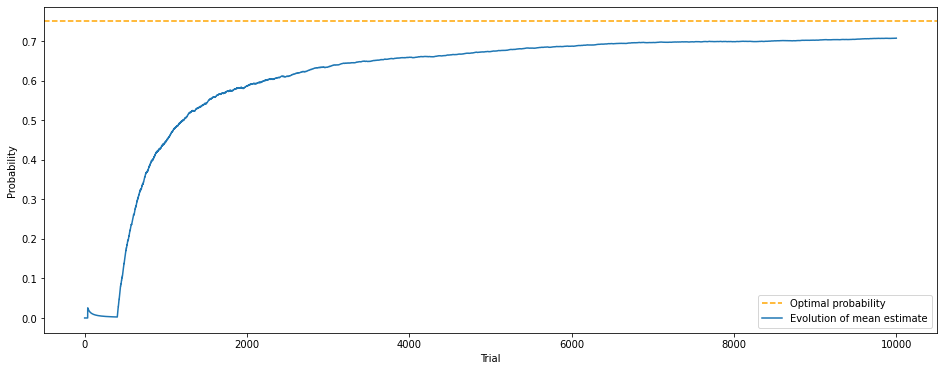

In [21]:
# Never approaches optimal value
fig = plt.figure(figsize=(16,6))
plt.axhline(optimal_prob, color='orange', linestyle='--')
plt.plot(mean_evolution)
plt.xlabel('Trial')
plt.ylabel('Probability')
plt.legend(['Optimal probability','Evolution of mean estimate'])

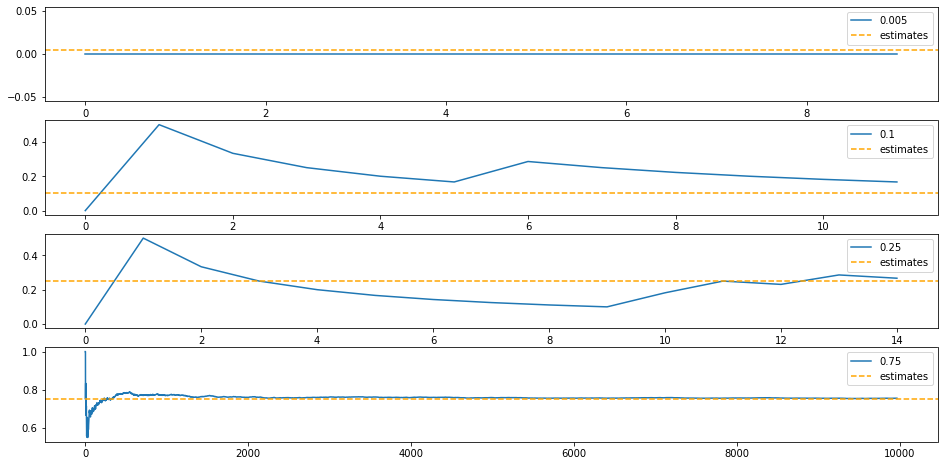

In [22]:
#Epsilon-Greedy Algorithm applied to the problem
current_mean = 0
mean_evolution = []
bandit_list = list(map(bandits.Bandit, PROBS))
optimal_prob = max(PROBS)
optimal_estimates = [max(map(lambda x: x.x_mean, bandit_list))]
estimates_evolution = [[] for slot in bandit_list]

# Epsilon - Greedy algorithm
for ind, trial_num in enumerate(range(N)):
    if random.random() < TIME_VARING_EPSILON[ind]:
        #Explore
        slot_index = random.choice(range(4))
        outcome = bandit_list[slot_index].pull()
        estimates_evolution[slot_index].append(bandit_list[slot_index].update(outcome))
        current_mean += (outcome - current_mean)/(trial_num + 1)
    else:
        #Exploit
        best_slot_index = np.argmax(list(map(lambda x: x.x_mean, bandit_list)))        
        outcome = bandit_list[best_slot_index].pull()
        estimates_evolution[best_slot_index].append(bandit_list[best_slot_index].update(outcome))
        current_mean += (outcome - current_mean)/(trial_num + 1)
    mean_evolution.append(current_mean)
    optimal_estimates.append(max(map(lambda x: x.x_mean, bandit_list)))  
    
plot_evolution(estimates_evolution)

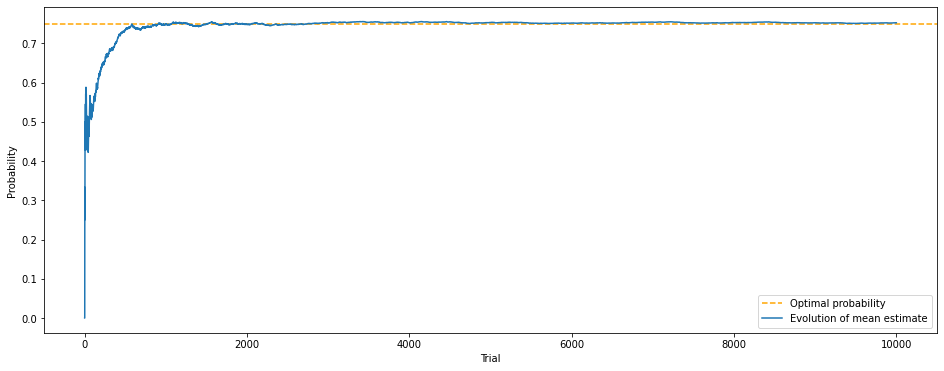

In [23]:
# Approaches optimal value
fig = plt.figure(figsize=(16,6))
plt.axhline(optimal_prob, color='orange', linestyle='--')
plt.plot(mean_evolution)
plt.xlabel('Trial')
plt.ylabel('Probability')
plt.legend(['Optimal probability','Evolution of mean estimate'])